**Clustering**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2.0,13.0,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2.0,3.0,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5.0,11.0,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6.0,2.0,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8.0,7.0,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


**k**-**means** **clustering**

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
kmeans_model = KMeans(n_clusters=2)

# assign each data point to a cluster
kmeans_result = kmeans_model.fit_predict(training_data)

# get all of the unique clusters
kmeans_clusters = unique(kmeans_result)

# plot the DBSCAN clusters
for dbscan_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = where(kmeans_result == kmeans_clusters)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: operands could not be broadcast together with shapes (1000,) (2,) 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_df, columns=df.columns)

df_scaled.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.384097,-0.920202,0.646548,0.593885,-0.819312,0.733919,2.277303,-0.963124,1.493302,0.982693,...,-0.469244,-0.753174,-0.758777,-0.708501,0.907756,-0.678755,0.760414,0.965619,1.048265,0.678770
1,-0.682934,-0.460889,0.651748,1.000337,-1.633111,0.863749,-0.085626,-0.963124,-0.898965,-0.374797,...,-0.420061,-0.085682,-1.774016,-0.539523,0.451339,1.027074,-0.136340,-0.547354,0.360194,-1.591562
2,0.810436,0.318437,-1.164801,-0.620392,0.107384,0.784105,2.005465,-0.150804,1.014849,-0.544484,...,-0.404938,-1.599053,1.185633,2.226264,0.085107,-1.507484,-0.580217,0.984303,-0.918164,-2.208959
3,-0.495232,0.222819,0.263441,0.236142,0.413784,-1.215624,0.145214,0.119969,-1.138192,0.813007,...,0.618763,1.292848,0.530923,0.724033,-1.220415,0.821291,-1.167259,-0.392366,-0.108250,0.305028
4,-0.665012,-1.047074,-0.268413,-1.826902,-0.284129,-1.845435,0.792017,0.661515,0.057942,-0.544484,...,-1.609509,-0.430927,0.321690,0.217356,-1.485420,0.842868,-0.624438,1.171162,-0.379202,-1.141092


In [ ]:
from sklearn.cluster import KMeans

# Initialize the KMeans model with the desired number of clusters
kmeans = KMeans(n_clusters=3)

kmeans_cluster = kmeans.fit_predict(df_scaled)

df_scaled['Cluster'] = kmeans_cluster

df_scaled.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Cluster
0,-0.384097,-0.920202,0.646548,0.593885,-0.819312,0.733919,2.277303,-0.963124,1.493302,0.982693,...,-0.753174,-0.758777,-0.708501,0.907756,-0.678755,0.760414,0.965619,1.048265,0.678770,1
1,-0.682934,-0.460889,0.651748,1.000337,-1.633111,0.863749,-0.085626,-0.963124,-0.898965,-0.374797,...,-0.085682,-1.774016,-0.539523,0.451339,1.027074,-0.136340,-0.547354,0.360194,-1.591562,2
2,0.810436,0.318437,-1.164801,-0.620392,0.107384,0.784105,2.005465,-0.150804,1.014849,-0.544484,...,-1.599053,1.185633,2.226264,0.085107,-1.507484,-0.580217,0.984303,-0.918164,-2.208959,1
3,-0.495232,0.222819,0.263441,0.236142,0.413784,-1.215624,0.145214,0.119969,-1.138192,0.813007,...,1.292848,0.530923,0.724033,-1.220415,0.821291,-1.167259,-0.392366,-0.108250,0.305028,0
4,-0.665012,-1.047074,-0.268413,-1.826902,-0.284129,-1.845435,0.792017,0.661515,0.057942,-0.544484,...,-0.430927,0.321690,0.217356,-1.485420,0.842868,-0.624438,1.171162,-0.379202,-1.141092,2


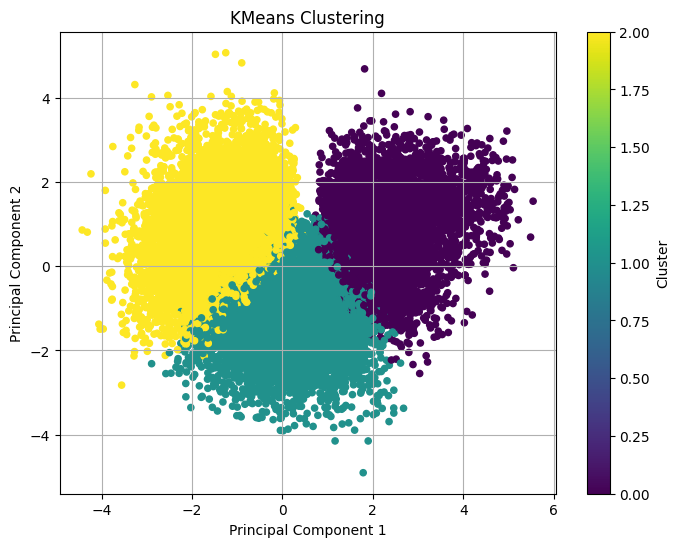

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_cluster, cmap='viridis', s=20)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

**DBSCAN Clustering**

In [ ]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# initialize the data set we'll work with
training_data, _ = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=4
)

# define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# train the model
dbscan_model.fit(training_data)

# assign each data point to a cluster
dbscan_result = dbscan_model.predict(training_data)

# get all of the unique clusters
dbscan_cluster = unique(dbscan_result)

# plot the DBSCAN clusters
for dbscan_cluster in dbscan_clusters:
    # get data points that fall in this cluster
    index = where(dbscan_result == dbscan_clusters)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the DBSCAN plot
pyplot.show()

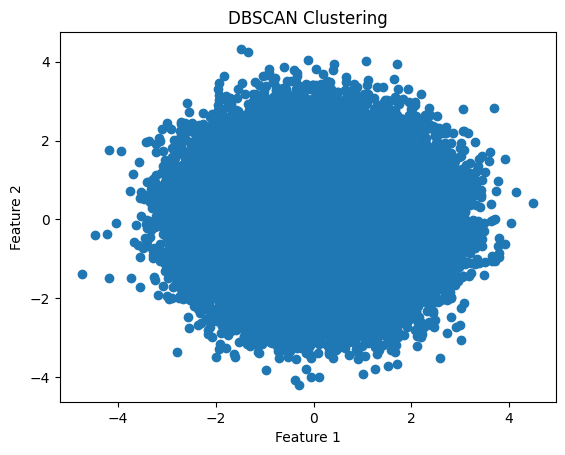

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

# Load the dataset
data = pd.read_csv('data.csv')

# Extract features
X = data.iloc[:, 1:].values  # Assuming the first column is 'id' and rest are features

# Define the model
dbscan_model = DBSCAN(eps=0.25, min_samples=9)

# Train the model
dbscan_model.fit(X)

# Assign each data point to a cluster
dbscan_result = dbscan_model.labels_

# Get all of the unique clusters
dbscan_clusters = np.unique(dbscan_result)

# Plot the DBSCAN clusters
for cluster in dbscan_clusters:
    # Get data points that fall in this cluster
    index = np.where(dbscan_result == cluster)
    # Make the plot
    plt.scatter(X[index, 0], X[index, 1])

# Show the DBSCAN plot
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**Gaussian Mixture Model algorithm**

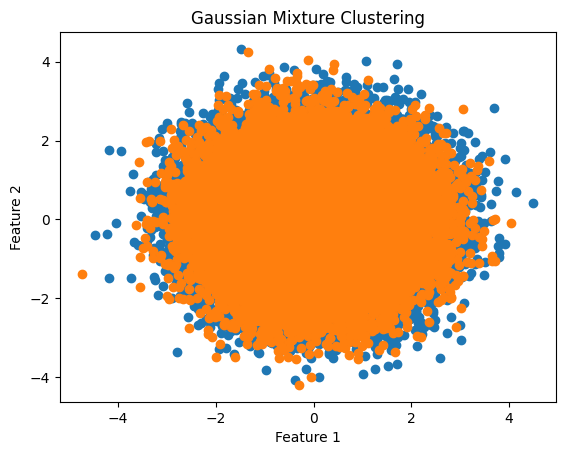

In [ ]:
from sklearn.mixture import GaussianMixture

# Extract features
X = data.iloc[:, 1:].values  # Assuming the first column is 'id' and rest are features

# Define the model
gaussian_model = GaussianMixture(n_components=2)

# Train the model
gaussian_model.fit(X)

# Assign each data point to a cluster
gaussian_result = gaussian_model.predict(X)

# Get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# Plot the Gaussian Mixture clusters
for cluster in gaussian_clusters:
    # Get data points that fall in this cluster
    index = np.where(gaussian_result == cluster)
    # Make the plot
    plt.scatter(X[index, 0], X[index, 1])

# Show the Gaussian Mixture plot
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


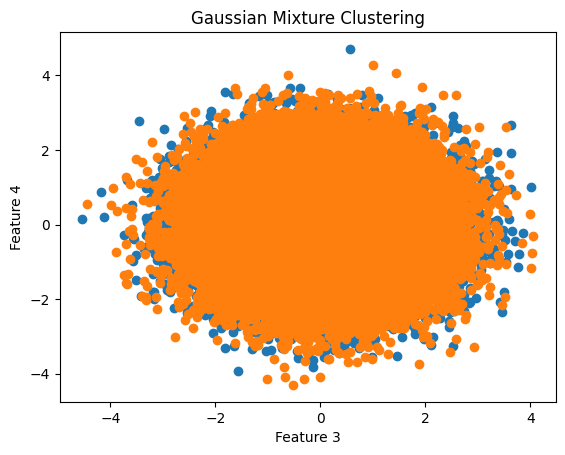

In [ ]:
from sklearn.mixture import GaussianMixture

# Extract features
X = data.iloc[:, 5:10].values   # Assuming columns 3 and 4 are to be used for clustering

# Define the model
gaussian_model = GaussianMixture(n_components=2)

# Train the model
gaussian_model.fit(X)

# Assign each data point to a cluster
gaussian_result = gaussian_model.predict(X)

# Get all of the unique clusters
gaussian_clusters = np.unique(gaussian_result)

# Plot the Gaussian Mixture clusters
for cluster in gaussian_clusters:
    # Get data points that fall in this cluster
    index = np.where(gaussian_result == cluster)
    # Make the plot
    plt.scatter(X[index, 0], X[index, 1])

# Show the Gaussian Mixture plot
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 3')
plt.ylabel('Feature 4')
plt.show()


**BIRCH algorithm**

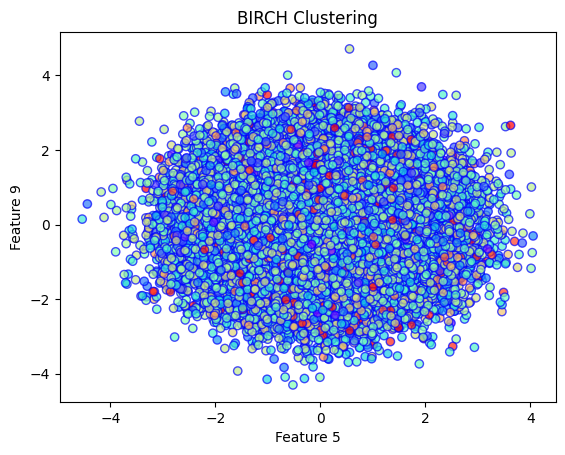

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

# Load the dataset
data = pd.read_csv('data.csv')

# Extract features
X = data.iloc[:, 5:10].values  # Extracting columns 5 to 9 for clustering

# Creating the BIRCH clustering model
model = Birch(branching_factor=50, n_clusters=None, threshold=1.5)

# Fit the data (Training)
model.fit(X)

# Predict the same data
pred = model.predict(X)

# Creating a scatter plot
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.title('BIRCH Clustering')
plt.xlabel('Feature 5')
plt.ylabel('Feature 9')
plt.show()
